## Country Data for Charity

This dataset contains socio-economic and health factors that determine the overall development of 167 countries out of 195 in the world. The purpose of the dataset is to help a charity fighting poverty to identify groups of countries where it is needed most.
<br<>>

Which countries can be grouped together and have the highest need of help from the charity?


Kaggle Data: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?select=data-dictionary.csv

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython import display

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Loading the dataset

In [3]:
## loading data
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Descriptive Analysis

In [4]:
df.info()
## there are 167 records/countries and 10 columns 
## 1 categorical variables and remaining 9 numeric variables
## 7 float columns and 2 integer columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
## getting column description 
col_description = pd.read_csv('data-dictionary.csv')
pd.set_option('display.max_colwidth', None)

col_description 

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [6]:
## checking misssing values: no missing values
df.isnull().sum() 

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
## statistics of variables
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
## checking for duplicates: no duplicates
df['country']. nunique() # 167 same as 167 rows

167

In [9]:
## explore unique values for each column
column_names = list(df.columns)
for col in column_names:
    print(col, ':', df[col].nunique(), )

country : 167
child_mort : 139
exports : 147
health : 147
imports : 151
income : 156
inflation : 156
life_expec : 127
total_fer : 138
gdpp : 157


## Explorative Analysis

In [10]:
## the numerical columns names into num_col
num_col = df.columns[1:]
num_col 


## subset of df with only numerical columns ( 'country' is removed)
num_df = df.iloc[:,1:]
num_df.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


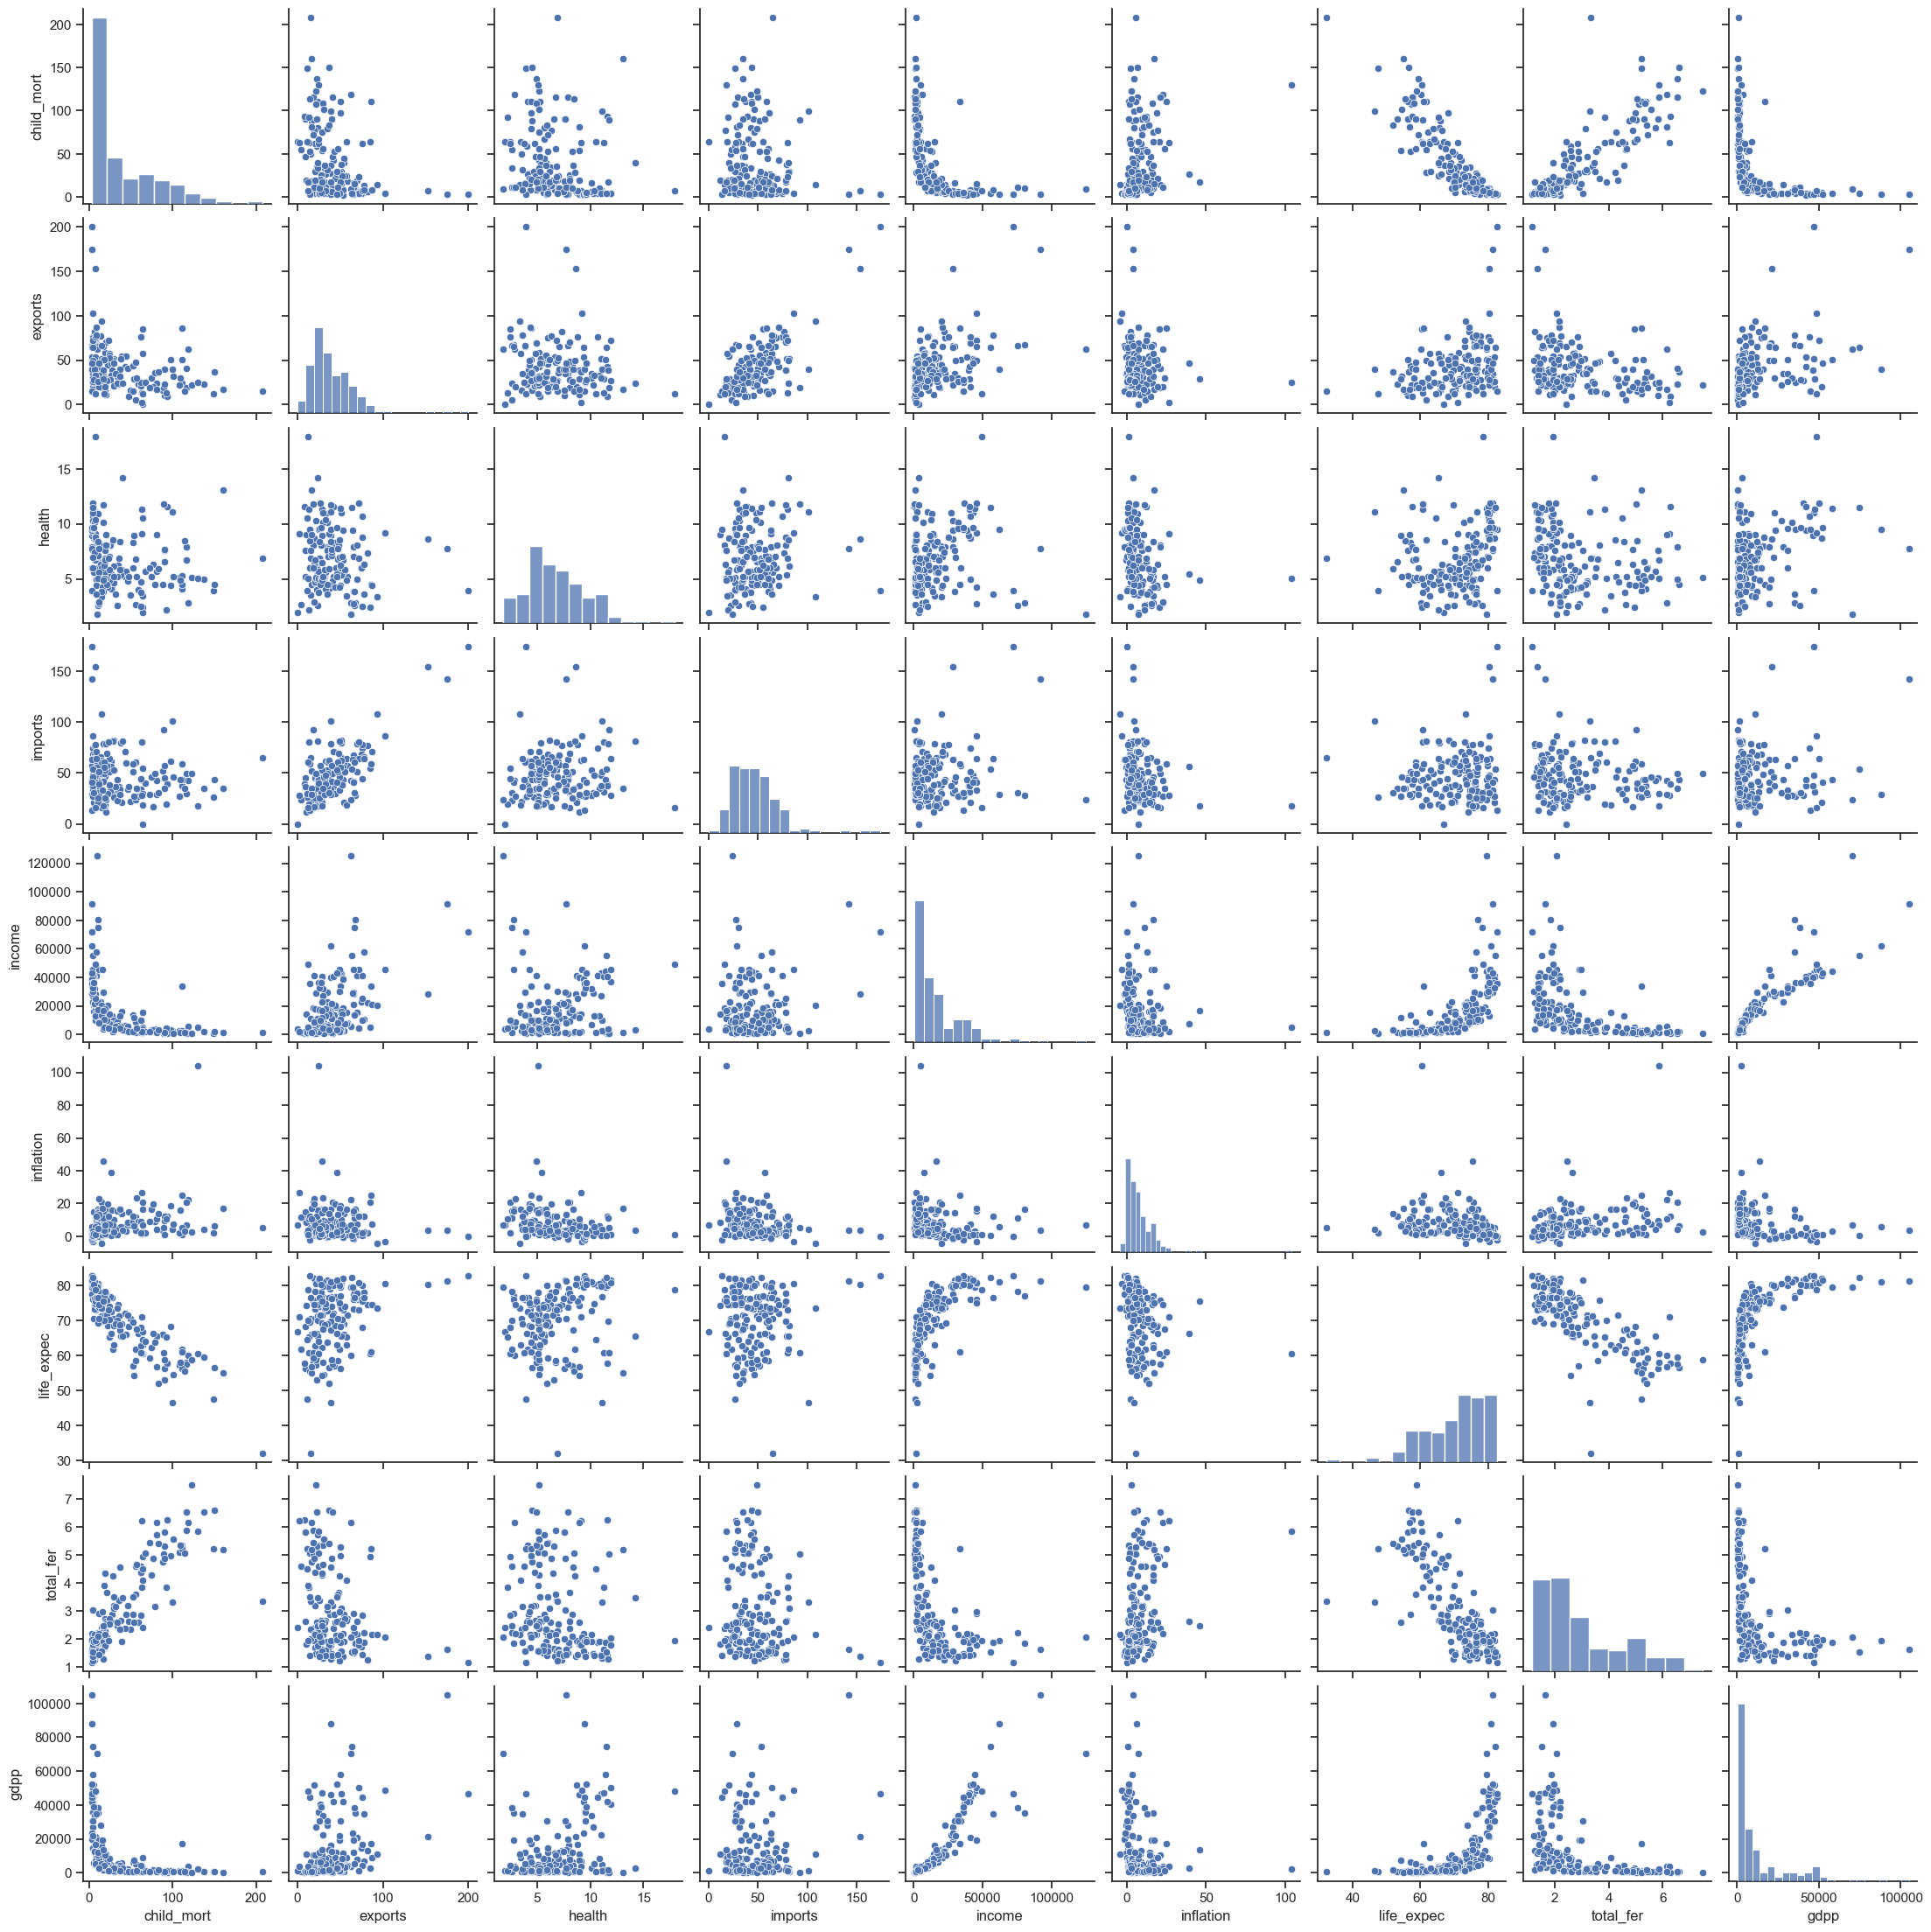

In [11]:
## inital pairplot visualisation to see overall dsitribution or relationship
sns.set_theme(style="ticks")
sns.pairplot(df.loc[:,num_col])

/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_82430/1783079927.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])
/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_82430/1783079927.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])
/var/folders/j8/vzdf

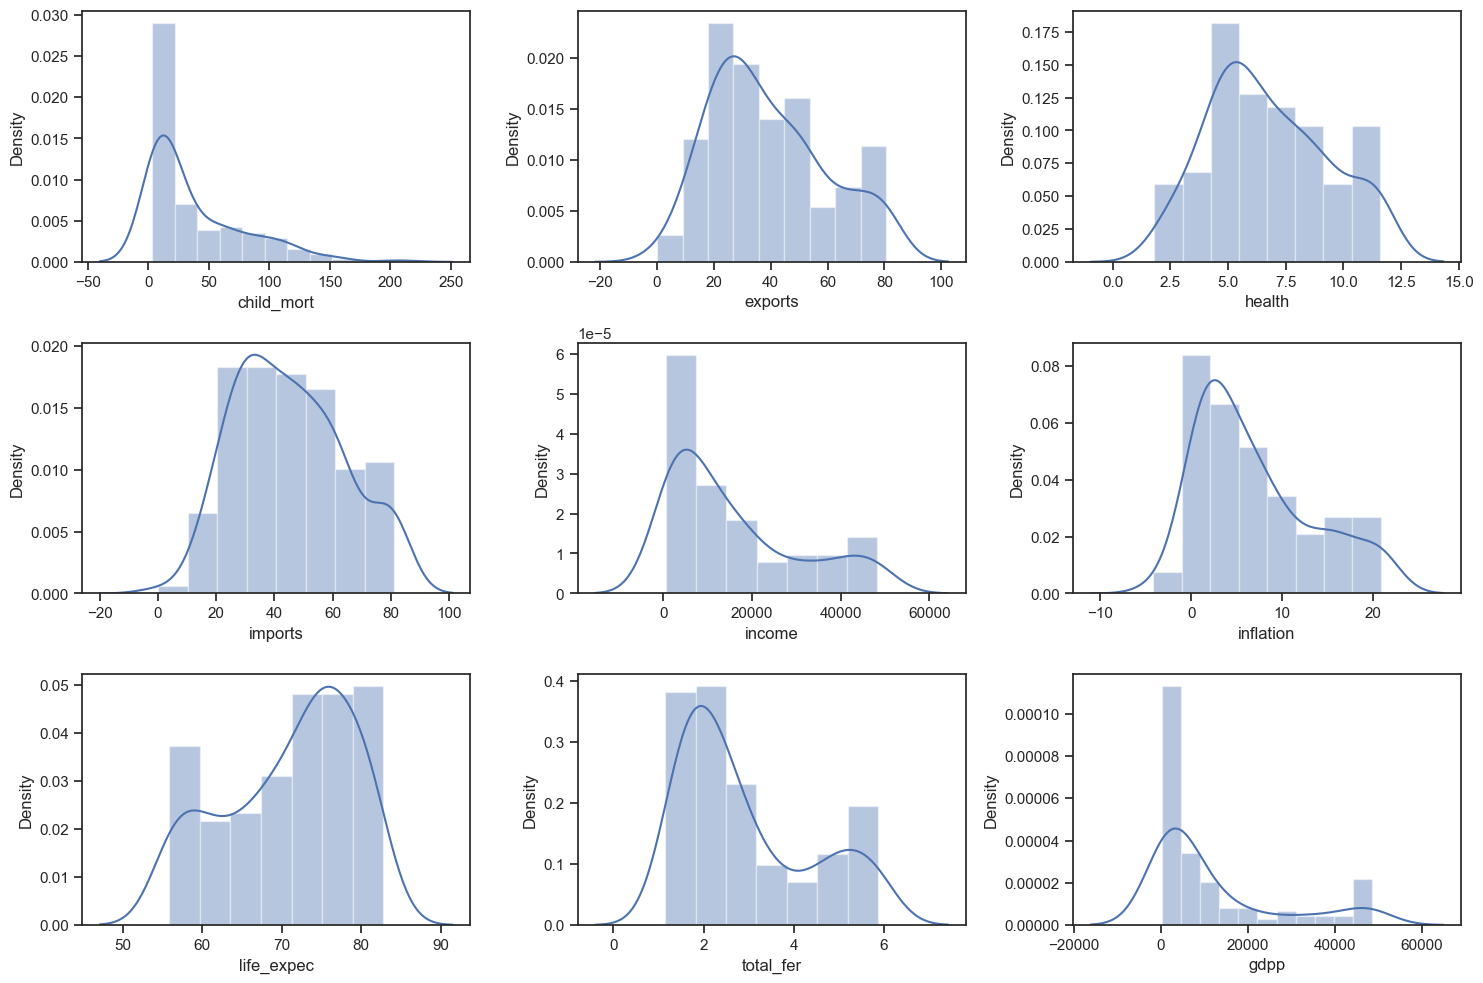

In [99]:
#quick distribution of each numerical feature or the world's current level
plt.figure(figsize=(15,10))
for i in enumerate(num_col):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

plt.tight_layout()


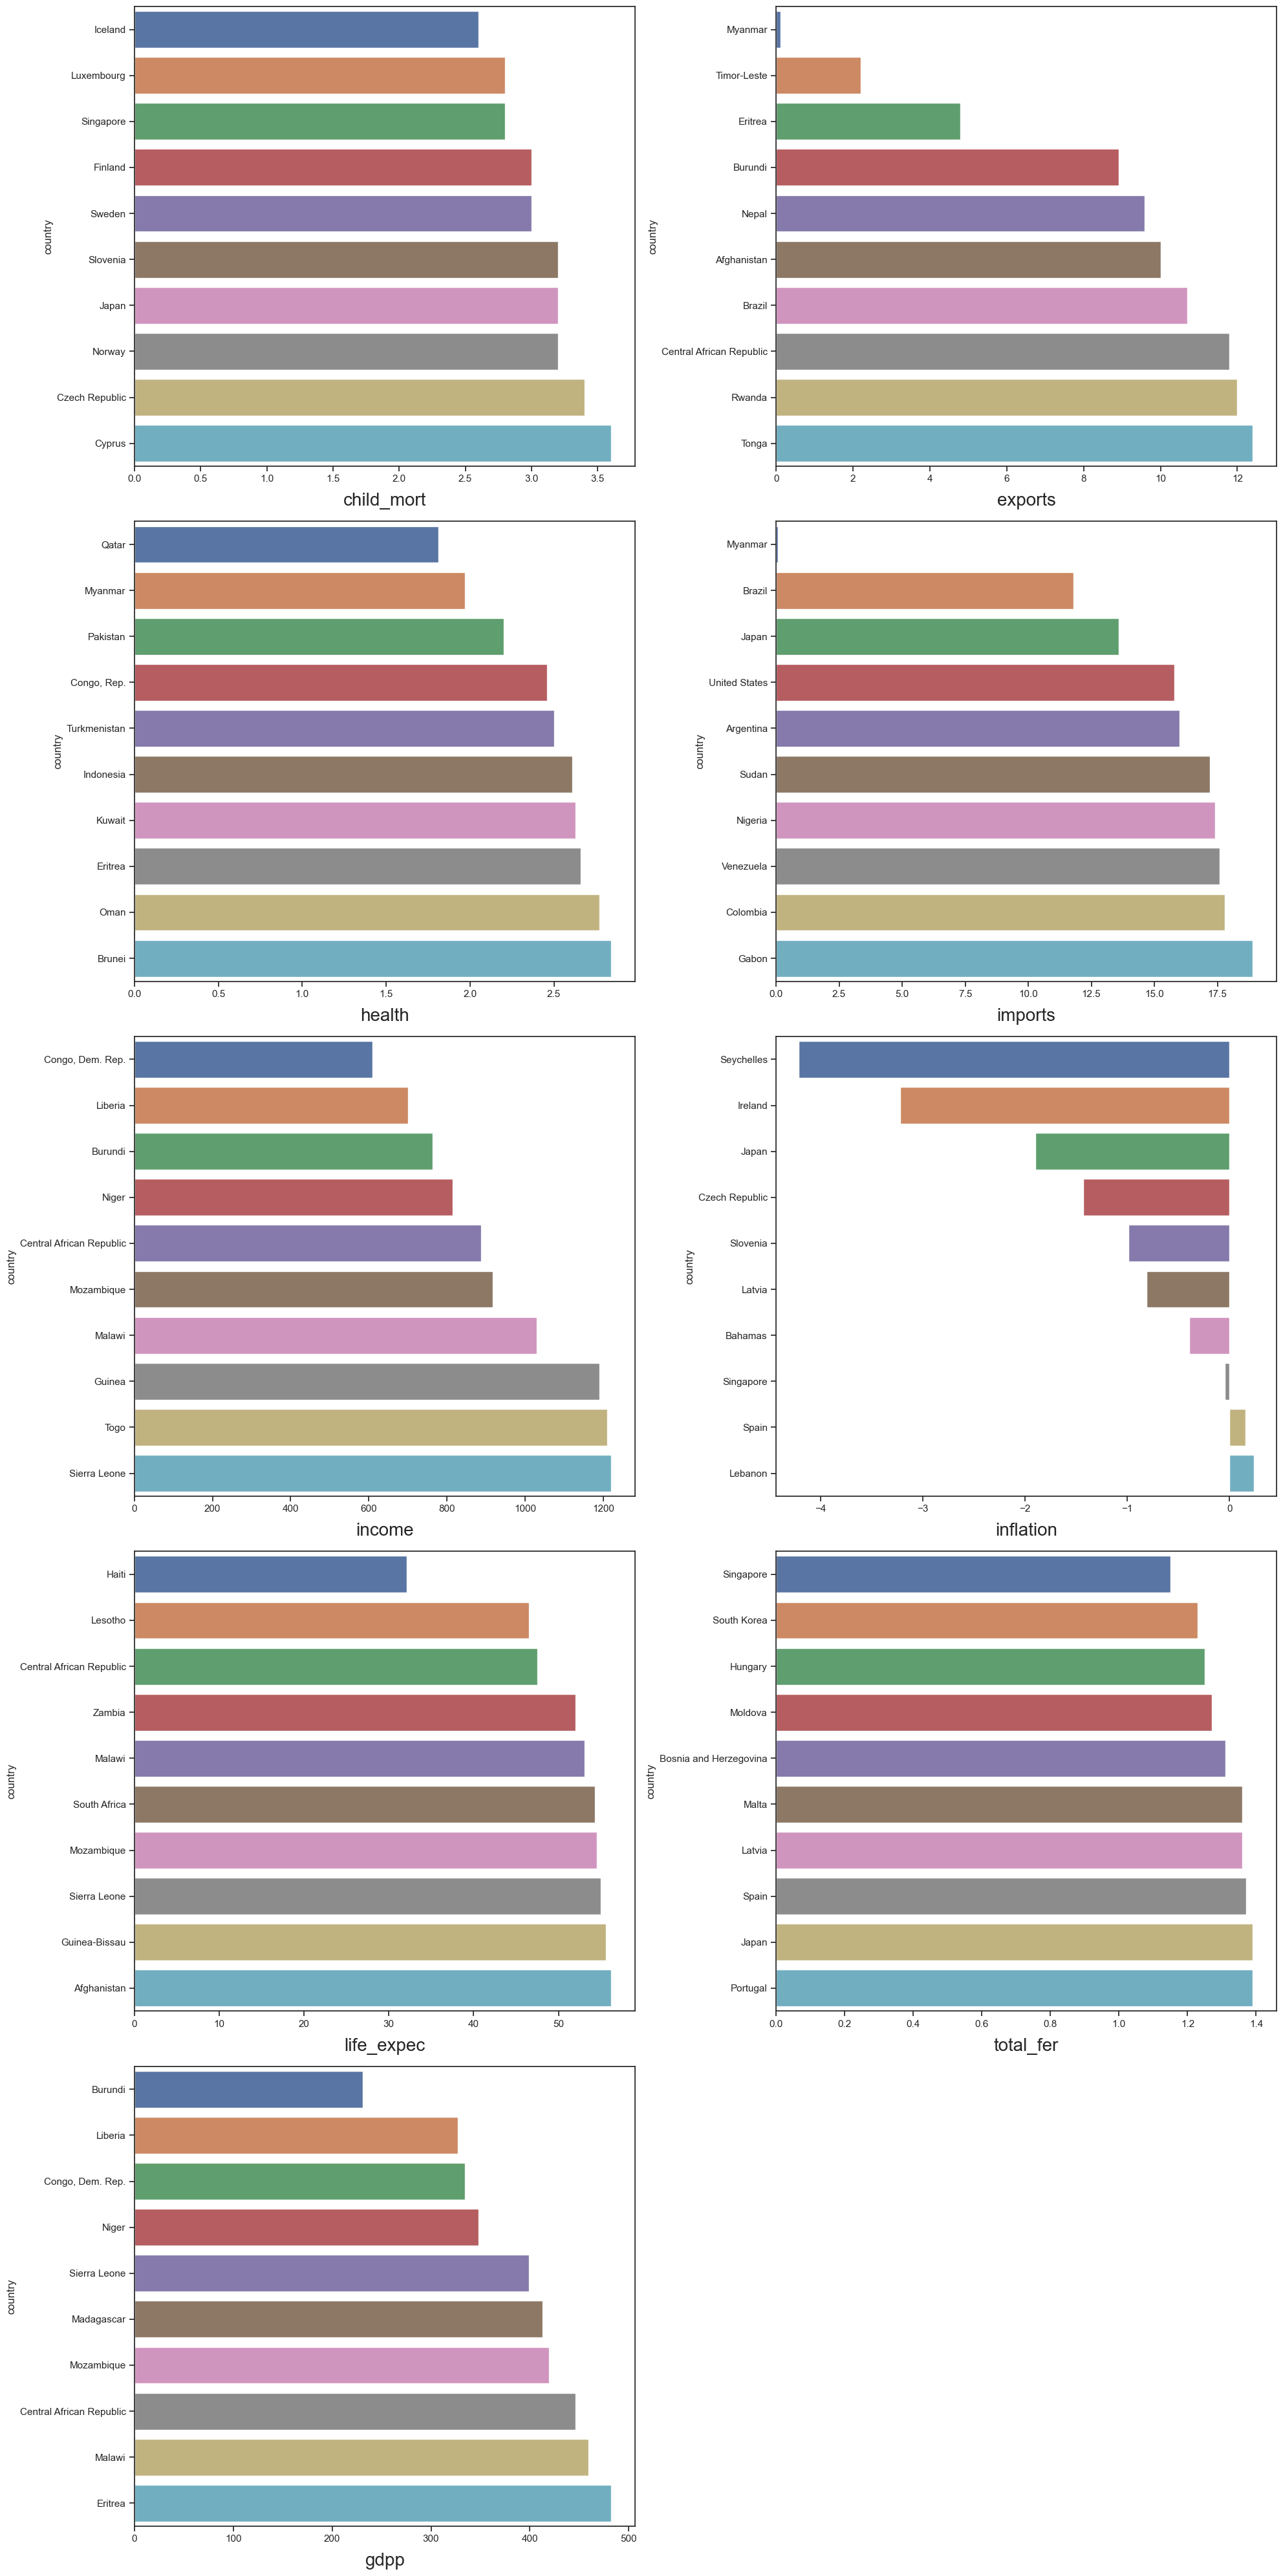

In [13]:
## Barplot of Top 10 countries of each numerical feature


#  Categorical Data
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (20,40))
#plt.suptitle("SUBPLOTS with FOR loop - example #1", fontsize = 18)

for i in num_col:
    plt.subplot(a, b, c)
    #plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i, fontsize = 20, labelpad=10)
    data = df.sort_values(by=[i], ascending=True) ## change ascending to False to get top 10 lowest
    sns.barplot(data=data[:10], x=i, y="country")
    c = c + 1

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

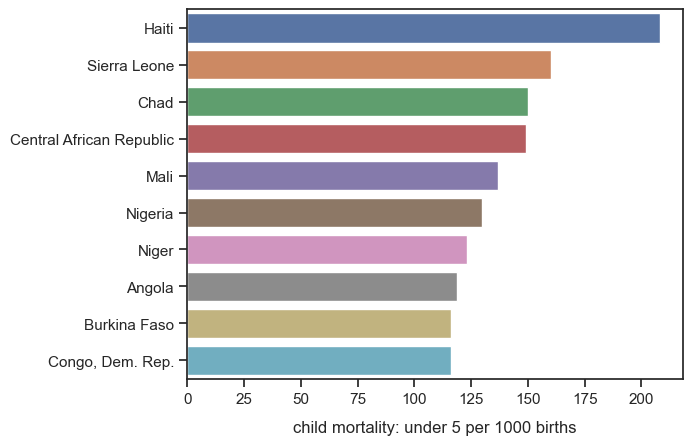

In [14]:
## getting individual barplot 

feature = 'child_mort' #change the name of feature here
data_child = df.sort_values(by=[feature], ascending=False)
sns.barplot(data=data_child[:10], x=feature, y="country")
plt.ylabel(None)
plt.xlabel('child mortality: under 5 per 1000 births',labelpad=10) ## change x legend here
plt.show

## Correlation Matrix
To check the linear relationship between all variables

The pairs with high absolute correlation coefficients are:
-gdp + income = 0.9
-child mortality + life expectancy = -0.89
-child mortality + total fertility = 0.85
-total fertility + life expectancy = -0.76

below 0.75
-imports + exports = 0.74
-life expectancy + income = 0.61
-life expectancy + gdp - 0.6


I avoid selecting highly correlated pairs to avoid multicollinearity so I have chosen:\
-gdp, \
-child mortality, \
-life expectancy, \
-income\
that will determine the countries in need

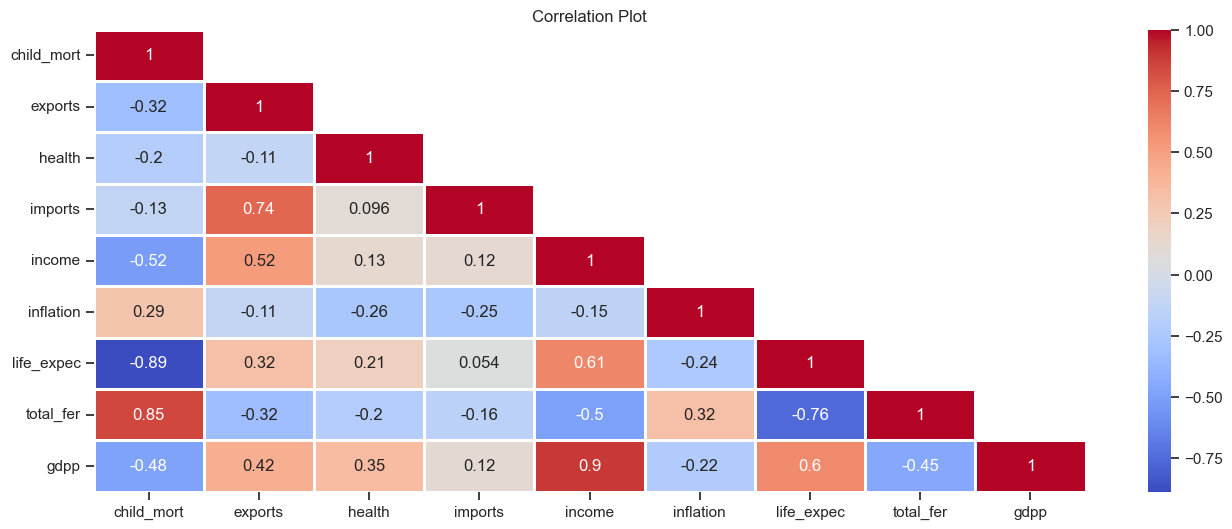

In [15]:
## The correlation matrix
corr_mat = df.corr(numeric_only=True)
corr_mat

plt.figure(figsize=(16,6))
mask = np.triu(corr_mat,k=1)
sns.heatmap(corr_mat, annot=True, linewidths=1, mask=mask, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

## Cleaning the dataset

There are outliers in every feature. We won't remove as we have few outliers and it means those countries won't be considere
to received help.

We will cap the outliers at the 5% lower bound of 95% upper end of the dataset distribution. So any outliers beyond those
quantiles will be replaced by the Q(5) and Q(95).


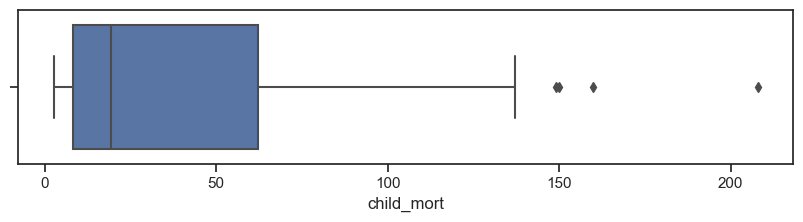

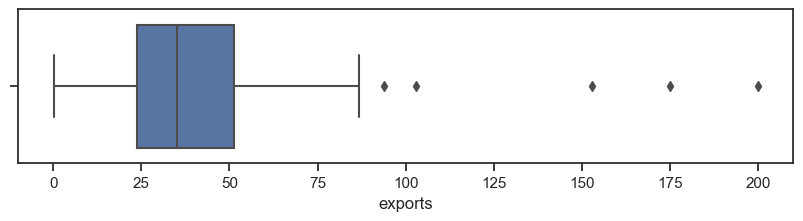

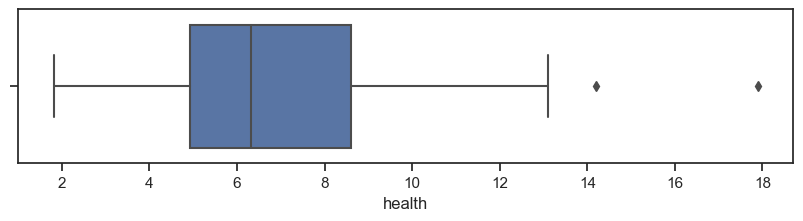

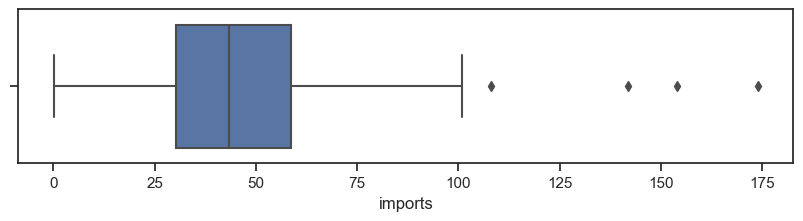

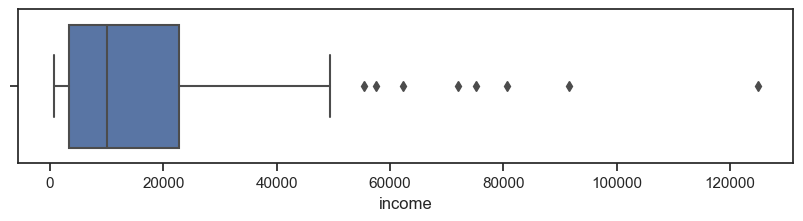

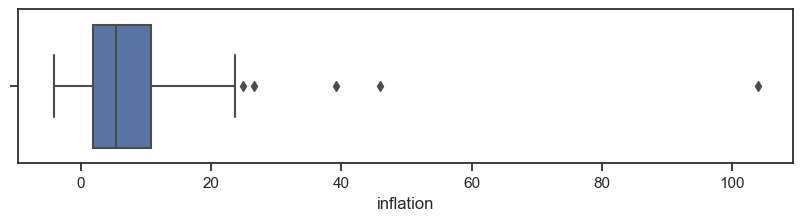

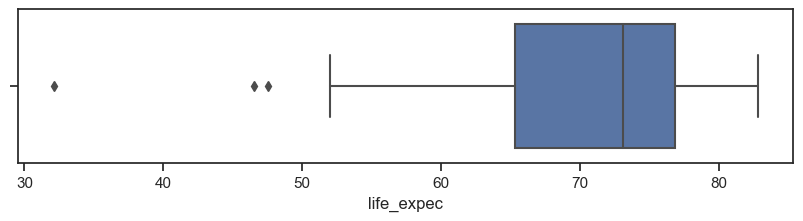

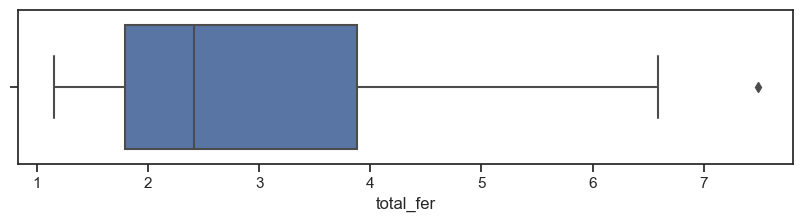

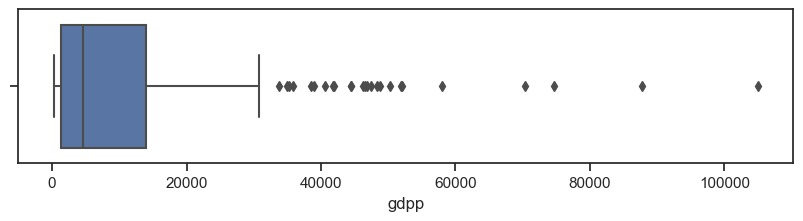

In [16]:
## explore distribution of each characteristic using boxplots , especially outliers with showfliers=False/True
for column in num_col:
    plt.figure(figsize=(10,2))
    #df.boxplot([column])
    sns.boxplot(data=df, x=column, showfliers= True) # set showfliers to False to remove outliers

In [17]:
# Replacing the outliers with their Q(5) or Q(95)

    
q1 = df['child_mort'].quantile(0.05)
df['child_mort'][df['child_mort']<=q1] = q1

#for export
q4 = df['exports'].quantile(0.95)
df['exports'][df['exports']>=q4] = q4

#for health
q4 = df['health'].quantile(0.95)
df['health'][df['health']>=q4] = q4

#for import
q4 = df['imports'].quantile(0.95)
df['imports'][df['imports']>=q4] = q4

#for income
q4 = df['income'].quantile(0.95)
df['income'][df['income']>=q4] = q4

#for inflation
q4 = df['inflation'].quantile(0.95)
df['inflation'][df['inflation']>=q4] =q4

#for life expec
q1 = df['life_expec'].quantile(0.05)
df['life_expec'][df['life_expec']<=q1] = q1

#for total_fer
q4 = df['total_fer'].quantile(0.95)
df['total_fer'][df['total_fer']>=q4] = q4

#for gdpp
q4 = df['gdpp'].quantile(0.95)
df['gdpp'][df['gdpp']>=q4] = q4

/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_82430/1958037486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['child_mort'][df['child_mort']<=q1] = q1
/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_82430/1958037486.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exports'][df['exports']>=q4] = q4
/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_82430/1958037486.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [18]:
#check outliers has been proceeded correctly

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.293653,39.077419,6.746407,45.149257,15738.760479,6.929317,70.863593,2.917479,11998.826347
std,40.308265,20.250846,2.564889,18.685703,14787.154215,6.384357,8.085376,1.443771,15158.213199
min,3.460000,0.109000,1.810000,0.065900,609.000000,-4.210000,55.780000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,82.800000,5.861000,48610.000000


## Standardisation of the data

The dataset's distribution is very varied so we have to scale down.

In [19]:
## create a scaler 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(num_df)


#convert series data to dataframe
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df.columns[1:10]
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## K-means clustering

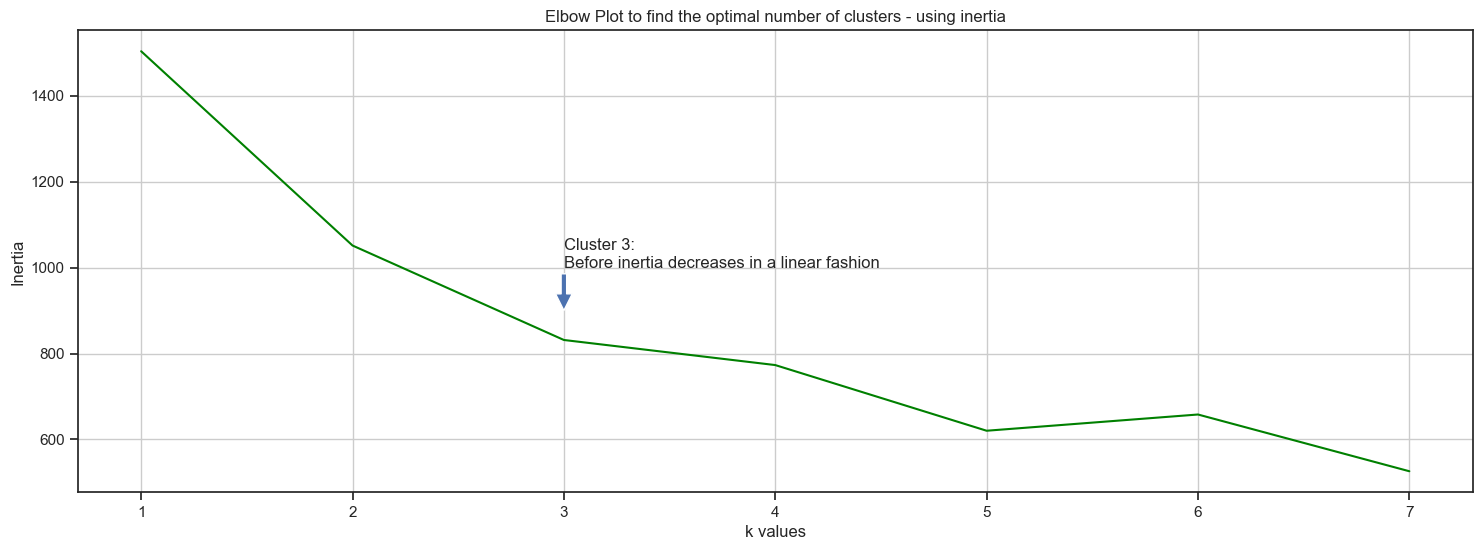

In [20]:
## plotting the inertia plot to find the best number of clusters
inertia_score = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k,n_init = 'auto')
    kmeans.fit(scaled_df)
    inertia_score.append(kmeans.inertia_)

#Visualizing the inertia vs k plot
plt.figure(figsize=(18,6)) 
sns.lineplot(x=range(1,8),y=inertia_score,color='green')  #Inertia: It is the sum of the squared distances of samples to their closest cluster center.
plt.xticks(range(1,8))
plt.xlabel('k values')
plt.ylabel('Inertia')
plt.title('Elbow Plot to find the optimal number of clusters - using inertia')
plt.annotate('Cluster 3:\nBefore inertia decreases in a linear fashion',xy=(3,900),xytext=(3,1000),arrowprops={})

plt.grid()
plt.show()

In [57]:
## fitting the KMeans model with k = 3 

kmeans = KMeans(n_clusters=3, init= 'random' , n_init=15)
kmeans.fit(scaled_df)
print("WCSS: ", kmeans.inertia_)
print("Iternations until converged: ", kmeans.n_iter_)
print("Final centroids: ")
print(kmeans.cluster_centers_)
print("Cluster assignments ")
print(kmeans.labels_)

#3 clusters WCSS: 831.4244352086873


WCSS:  831.4244352086873
Iternations until converged:  20
Final centroids: 
[[-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]
 [-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]]
Cluster assignments 
[2 1 1 2 1 1 1 0 0 1 1 0 1 1 1 0 1 2 1 1 1 2 1 0 1 2 2 1 2 0 1 2 2 1 1 1 2
 2 2 1 2 1 0 0 0 1 1 1 1 2 2 1 1 0 0 2 2 1 0 2 0 1 1 2 2 1 2 1 0 1 1 1 2 0
 0 0 1 0 1 1 2 2 0 1 2 1 1 2 2 1 1 0 1 2 2 1 1 2 0 2 1 1 1 1 1 1 2 1 2 1 0
 0 2 2 0 1 2 1 1 1 1 1 0 0 1 1 2 1 1 2 1 1 2 0 0 0 1 2 0 0 1 1 2 1 0 0 1 2
 1 2 2 1 1 1 1 2 1 0 0 0 1 1 1 1 1 2 2]


Text(0.5, 1.0, 'K-Means clustering: k= 3')

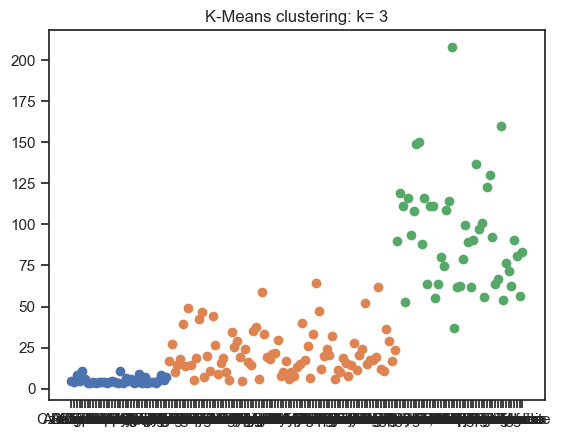

In [97]:
"""
---------------------------
Visualisee Overall clustering
---------------------------
"""

## This visualisation is in 2d which is why the x-axis is messed up. 

fig, ax = plt.subplots()
label_clusters = np.unique(kmeans.labels_) #array([0, 1, 2], dtype=int32)

for i in label_clusters:
    #Points of cluster
    points = df.iloc[kmeans.labels_==i]
    #print(f'cluster {i} : {points}')
    #Plot points
    plt.scatter(points.iloc[:,0], points.iloc[:,1]) ## plt.scatter(x,y)
    #Plot centroids
    #plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100, c='red')
    #print(kmeans.cluster_centers_) ## the [x,y] of each centroids

#Aesthetics    
ax.set_title('K-Means clustering: k= 3')
#ax.set_xlabel(header[0])
#ax.set_ylabel(header[1])

In [60]:
## adding to original data the cluster's assignment at the last column

label = pd.DataFrame(kmeans.labels_, columns = ['labels']) # index to 
df.kmeans = df.copy()
df.kmeans = pd.concat([df.kmeans,label],axis=1)
df.kmeans.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.820,553,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.650,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.890,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,20.87,60.1,5.861,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.130,12200,1


## Analysis of the 3 clusters

In [61]:
## number of data points for each cluster
df.kmeans.labels.value_counts()

labels
1    84
2    47
0    36
Name: count, dtype: int64

Text(0.5, 1.0, 'Life Expectancy vs GDPP')

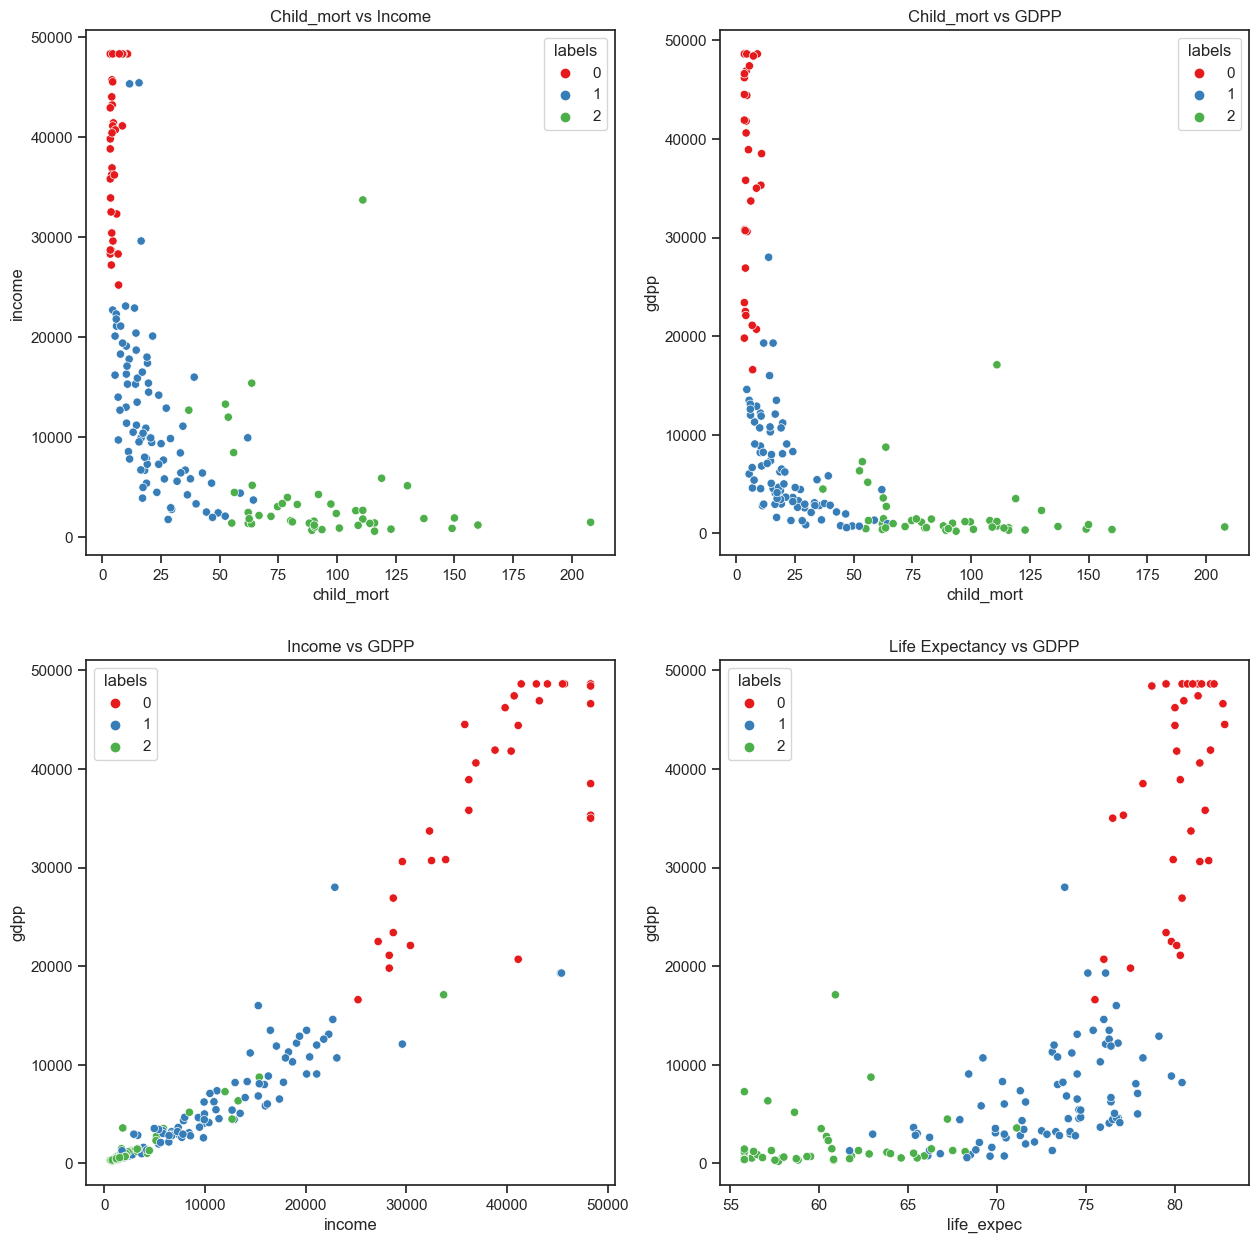

In [86]:
# visualisation of the 3 clusters

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.scatterplot(x='child_mort', y='income', hue='labels', data=df.kmeans, palette='Set1')
plt.title('Child_mort vs Income')

plt.subplot(2,2,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='labels', data=df.kmeans, palette='Set1')
plt.title('Child_mort vs GDPP')

plt.subplot(2,2,3)
sns.scatterplot(x='income', y='gdpp', hue='labels', data=df.kmeans, palette='Set1')
plt.title('Income vs GDPP')

plt.subplot(2,2,4)
sns.scatterplot(x='life_expec', y='gdpp', hue='labels', data=df.kmeans, palette='Set1')
plt.title('Life Expectancy vs GDPP')

In [87]:
#getting the mean of the 3 clusters

df_features = df.kmeans.drop(['country', 'exports', 'health', 'imports','inflation', 'total_fer'],axis=1).groupby('labels').mean()
df_features

,child_mort,income,life_expec,gdpp
labels,,,,
0,5.109444,39150.277778,80.127778,38016.388889
1,21.927381,12305.595238,72.814286,6486.452381
2,92.961702,3942.404255,60.281277,1922.382979


<Figure size 1500x1000 with 0 Axes>

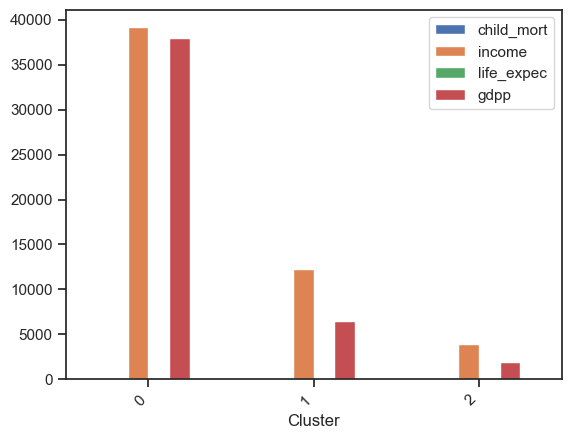

In [88]:
## barplots
## we can see that cluster has the lowest 
## can only see income and gdp as scales are different

plt.figure(figsize=(15,10))
df_features.plot(kind='bar')
plt.xlabel('Cluster')
plt.xticks(rotation=45, ha='right')

plt.show()


## Assigning & Choosing the cluster that has the countries in need

From the boxplots below, we can see that cluster 2 has the higest child mortality rate and lowest income leve, life expectancy and gdp.\
<br>
This cluster 2 is in need of the most help: the undervelopped countries.\
The opposite is cluster 0 which are the developped countries.\
The cluster 1 is in the middle: the developping countries.

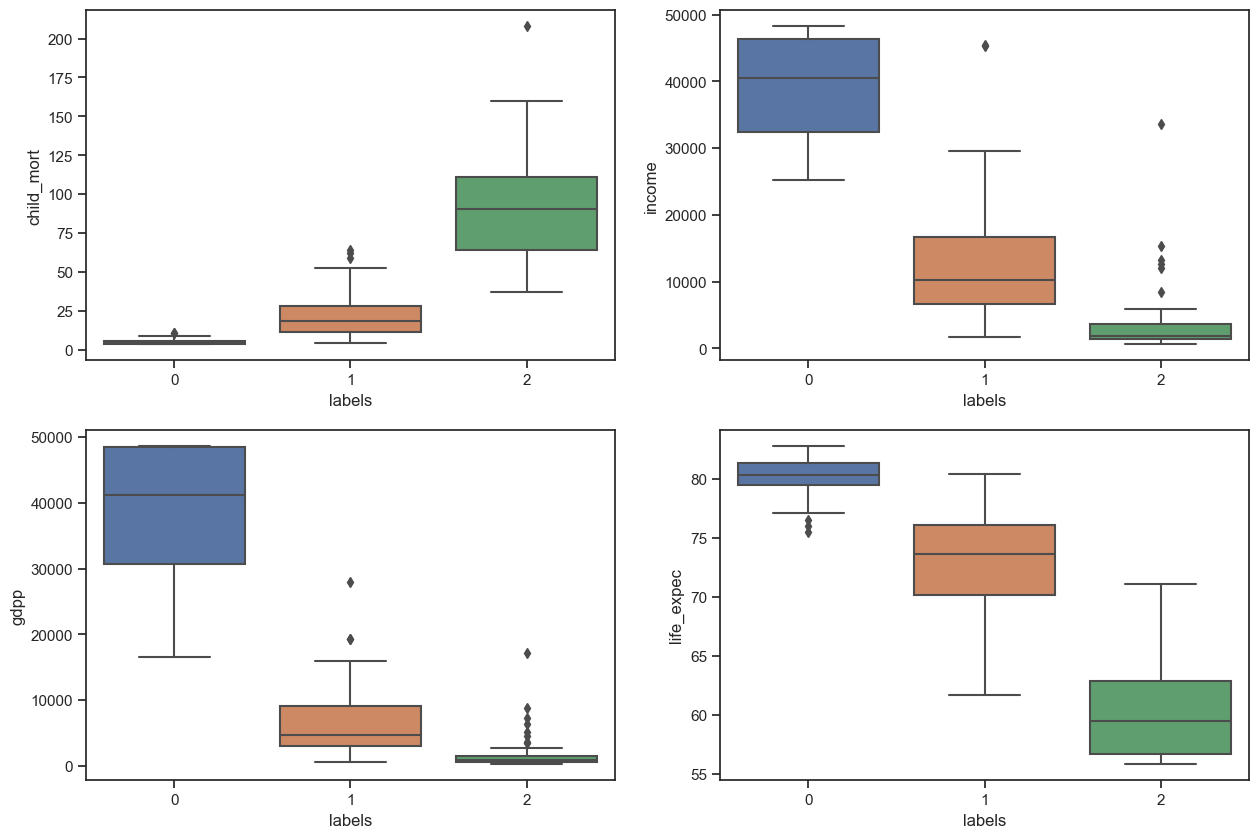

In [67]:
#plot boxplot

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='labels',y='child_mort',data=df.kmeans)

plt.subplot(2,2,2)
sns.boxplot(x='labels',y='income',data=df.kmeans)

plt.subplot(2,2,3)
sns.boxplot(x='labels',y='gdpp',data=df.kmeans)

plt.subplot(2,2,4)
sns.boxplot(x='labels',y='life_expec',data=df.kmeans)

plt.show()

In [71]:
#get all names of countries in cluster 2 that need help 

cluster2 = df.kmeans[df.kmeans['labels']==2]['country']
cluster2 

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [69]:
## getting the top 5 countries that are undervelopped that need the most aid.

df.kmeans[df.kmeans['labels']==2].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.45,55.78,3.330,662,2
132,Sierra Leone,160.0,16.8,11.57,34.5,1220.0,17.20,55.78,5.200,399,2
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.39,56.50,5.861,897,2
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.01,55.78,5.210,446,2
97,Mali,137.0,22.8,4.98,35.1,1870.0,4.37,59.50,5.861,708,2


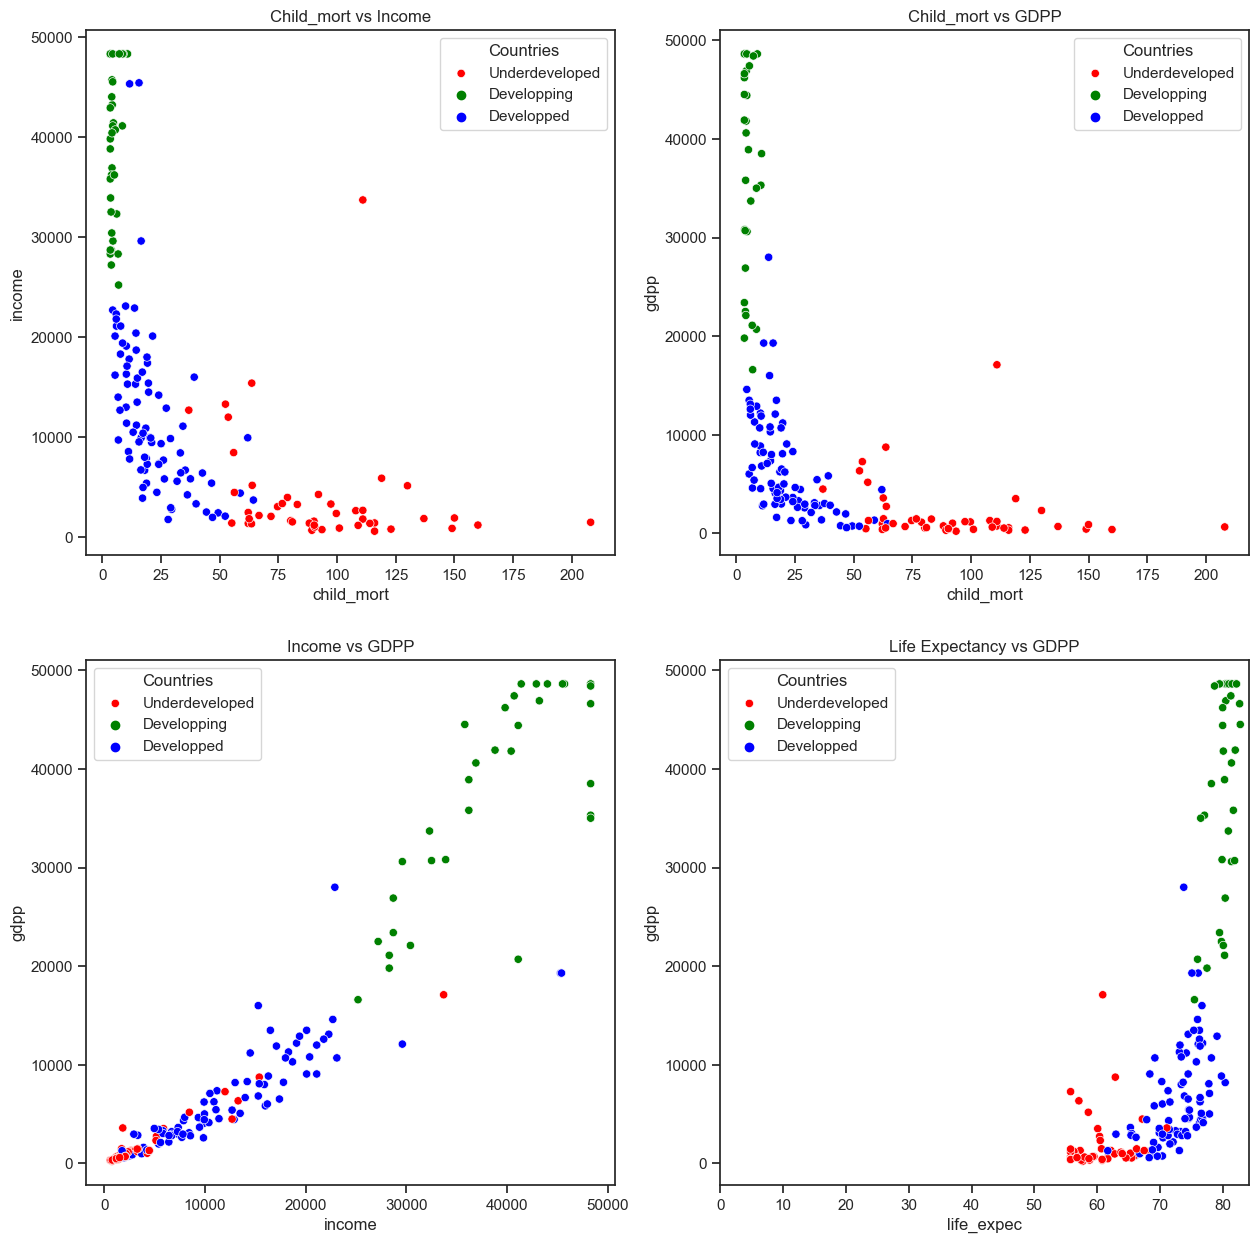

In [94]:
# final scatterplot of the 3 categories of countries: developped, developping and underdeveloped

## countries in need are in red

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.scatterplot(x='child_mort', y='income', hue='labels', data=df.kmeans, palette={0:'green',1:'blue',2:'red'})
plt.legend(title='Countries', loc='upper right', labels=['Underdeveloped','Developping','Developped'])
plt.title('Child_mort vs Income')

plt.subplot(2,2,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='labels', data=df.kmeans, palette=['green','blue','red'])
plt.legend(title='Countries', loc='upper right', labels=['Underdeveloped','Developping','Developped'])
plt.title('Child_mort vs GDPP')

plt.subplot(2,2,3)
sns.scatterplot(x='income', y='gdpp', hue='labels', data=df.kmeans, palette=['green','blue','red'])
plt.legend(title='Countries', loc='upper left', labels=['Underdeveloped','Developping','Developped'])
plt.title('Income vs GDPP')

plt.subplot(2,2,4)
sns.scatterplot(x='life_expec', y='gdpp', hue='labels', data=df.kmeans, palette=['green','blue','red'])
plt.legend(title='Countries', loc='upper left', labels=['Underdeveloped','Developping','Developped'])
plt.xlim(0)
plt.title('Life Expectancy vs GDPP')

plt.show()

## Conclusion

Countries in cluster 2 are the ones most in need and the 5 countries most in need are: Haiti, Sierra Leone, Chad, Central African Republic and Mali.

Next step:\
-try hierarchical clustering\
-try more clusters\
-consider other sets of features to base decision on who needs aid the most
